In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('../data/tweets.csv')

In [25]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [27]:
df.shape

(7613, 5)

In [29]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [30]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [31]:
df.duplicated().sum()

0

Colonnes utiles pour le modèle : 'text' et 'target' le texte du tweet et la classe cible

In [38]:
# Incohérences ou outliers ?
df['text_length'] = df['text'].astype(str).apply(len)
print("\nStatistiques descriptives sur la longueur des textes :")
print(df['text_length'].describe())


Statistiques descriptives sur la longueur des textes :
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64



Statistiques sur la longueur des tweets :
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64


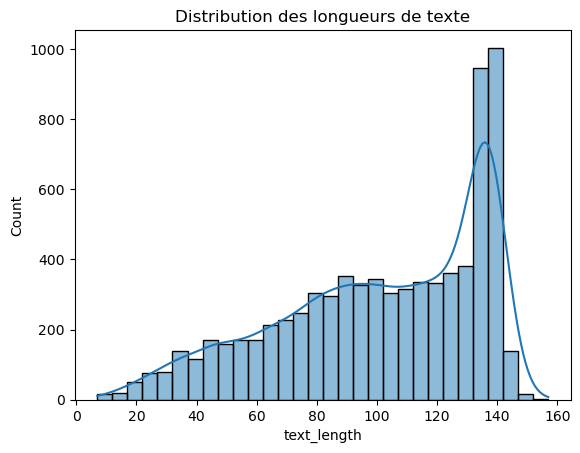

In [33]:
# Longueur des tweets
df['text_length'] = df['text'].astype(str).apply(len)
print("\nStatistiques sur la longueur des tweets :")
print(df['text_length'].describe())
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution des longueurs de texte")
plt.show()

In [34]:
# Tweets anormalement courts ou longs
print("\nTweets avec texte < 5 caractères :")
print(df[df['text_length'] < 5][['text', 'target']])


Tweets avec texte < 5 caractères :
Empty DataFrame
Columns: [text, target]
Index: []


In [35]:
print("\nTweets avec texte > 200 caractères :")
print(df[df['text_length'] > 200][['text', 'target']])


Tweets avec texte > 200 caractères :
Empty DataFrame
Columns: [text, target]
Index: []


In [36]:
# Affichage de quelques exemples aléatoires
print("\nExemples aléatoires :")
print(df[['text', 'target']].sample(5, random_state=42))


Exemples aléatoires :
                                                   text  target
2644  So you have a new weapon that can cause un-ima...       1
2227  The f$&amp;@ing things I do for #GISHWHES Just...       0
5448  DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...       1
132   Aftershock back to school kick off was great. ...       0
6845  in response to trauma Children of Addicts deve...       0



Répartition de la variable cible :
target
0    0.57034
1    0.42966
Name: proportion, dtype: float64


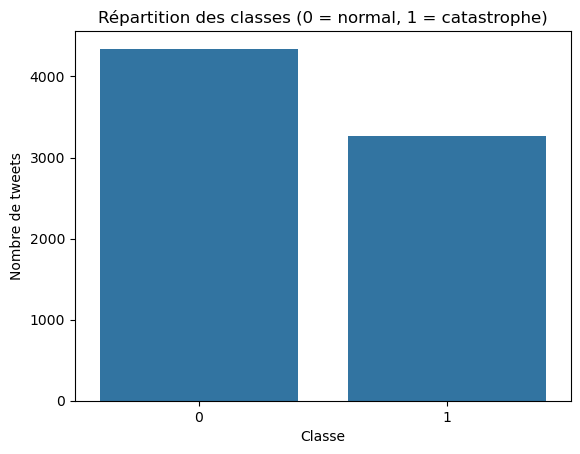

In [40]:
# Répartition de la variable cible
print("\nRépartition de la variable cible :")
print(df['target'].value_counts(normalize=True))
sns.countplot(x='target', data=df)
plt.title("Répartition des classes (0 = normal, 1 = catastrophe)")
plt.xlabel("Classe")
plt.ylabel("Nombre de tweets")
plt.show()

In [ ]:
print("\nÉchantillon de 10 tweets aléatoires :")
sample = df[['text', 'target']].sample(10, random_state=42)
print(sample)


Échantillon de 10 tweets aléatoires :
                                                   text  target
2644  So you have a new weapon that can cause un-ima...       1
2227  The f$&amp;@ing things I do for #GISHWHES Just...       0
5448  DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...       1
132   Aftershock back to school kick off was great. ...       0
6845  in response to trauma Children of Addicts deve...       0
5559  @Calum5SOS you look like you got caught in a r...       0
1765  my favorite lady came to our volunteer meeting...       1
1817  @brianroemmele UX fail of EMV - people want to...       1
6810  Can't find my ariana grande shirt  this is a f...       0
4398  The Murderous Story Of AmericaÛªs First Hijac...       1


Tweets target = 1 :
« new weapon », « George Galloway », « volunteer meeting », « UX fail », « hijack story »
=> On peut deviner que target = 1 pourrait être lié à des sujets graves ou violents (terrorisme, attentats, violence).

Tweets target = 0 :
Plus anodins, perso ou humoristiques : « GISHWHES », « back to school », « Ariana Grande shirt ».

Conclusion :

on voit que le target pourrait être prédictible :

Les tweets qui parlent de sujets sensibles ou violents tendent vers 1.

Les tweets banals, de la vie quotidienne ou humoristiques, sont 0.

